# 15 CLUSTERING ANALYSIS 

## Understanding and Implementing K-Means and DBSCAN Algorithms

### Objective:
The objective of this assignment is to introduce to various clustering algorithms, including K-Means, hierarchical, and DBSCAN, and provide hands-on experience in applying these techniques to a real-world dataset.


### Data Preprocessing:
1.	Preprocess the dataset to handle missing values, remove outliers, and scale the features if necessary.
2.	Perform exploratory data analysis (EDA) to gain insights into the distribution of data and identify potential clusters.
3.	Use multiple visualizations to understand the hidden patterns in the dataset


In [1]:
import pandas as pd 
import numpy as np 
df = pd.read_excel("EastWestAirlines.xlsx", sheet_name  = "data")
df.head()

,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
0,1,28143,0,1,1,1,174,1,0,0,7000,0
1,2,19244,0,1,1,1,215,2,0,0,6968,0
2,3,41354,0,1,1,1,4123,4,0,0,7034,0
3,4,14776,0,1,1,1,500,1,0,0,6952,0
4,5,97752,0,4,1,1,43300,26,2077,4,6935,1


In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3999 entries, 0 to 3998
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype
---  ------             --------------  -----
 0   ID#                3999 non-null   int64
 1   Balance            3999 non-null   int64
 2   Qual_miles         3999 non-null   int64
 3   cc1_miles          3999 non-null   int64
 4   cc2_miles          3999 non-null   int64
 5   cc3_miles          3999 non-null   int64
 6   Bonus_miles        3999 non-null   int64
 7   Bonus_trans        3999 non-null   int64
 8   Flight_miles_12mo  3999 non-null   int64
 9   Flight_trans_12    3999 non-null   int64
 10  Days_since_enroll  3999 non-null   int64
 11  Award?             3999 non-null   int64
dtypes: int64(12)
memory usage: 375.0 KB


In [3]:
df.duplicated().value_counts()

False    3999
Name: count, dtype: int64

In [4]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
ID#,3999.0,2014.819455,1160.764358,1.0,1010.5,2016.0,3020.5,4021.0
Balance,3999.0,73601.327582,100775.664958,0.0,18527.5,43097.0,92404.0,1704838.0
Qual_miles,3999.0,144.114529,773.663804,0.0,0.0,0.0,0.0,11148.0
cc1_miles,3999.0,2.059515,1.376919,1.0,1.0,1.0,3.0,5.0
cc2_miles,3999.0,1.014504,0.147650,1.0,1.0,1.0,1.0,3.0
cc3_miles,3999.0,1.012253,0.195241,1.0,1.0,1.0,1.0,5.0
Bonus_miles,3999.0,17144.846212,24150.967826,0.0,1250.0,7171.0,23800.5,263685.0
Bonus_trans,3999.0,11.601900,9.603810,0.0,3.0,12.0,17.0,86.0
Flight_miles_12mo,3999.0,460.055764,1400.209171,0.0,0.0,0.0,311.0,30817.0
Flight_trans_12,3999.0,1.373593,3.793172,0.0,0.0,0.0,1.0,53.0


In [5]:
new_df = df.copy()
new_df= new_df.drop(['ID#'], axis=1)
new_df.head()

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
0,28143,0,1,1,1,174,1,0,0,7000,0
1,19244,0,1,1,1,215,2,0,0,6968,0
2,41354,0,1,1,1,4123,4,0,0,7034,0
3,14776,0,1,1,1,500,1,0,0,6952,0
4,97752,0,4,1,1,43300,26,2077,4,6935,1


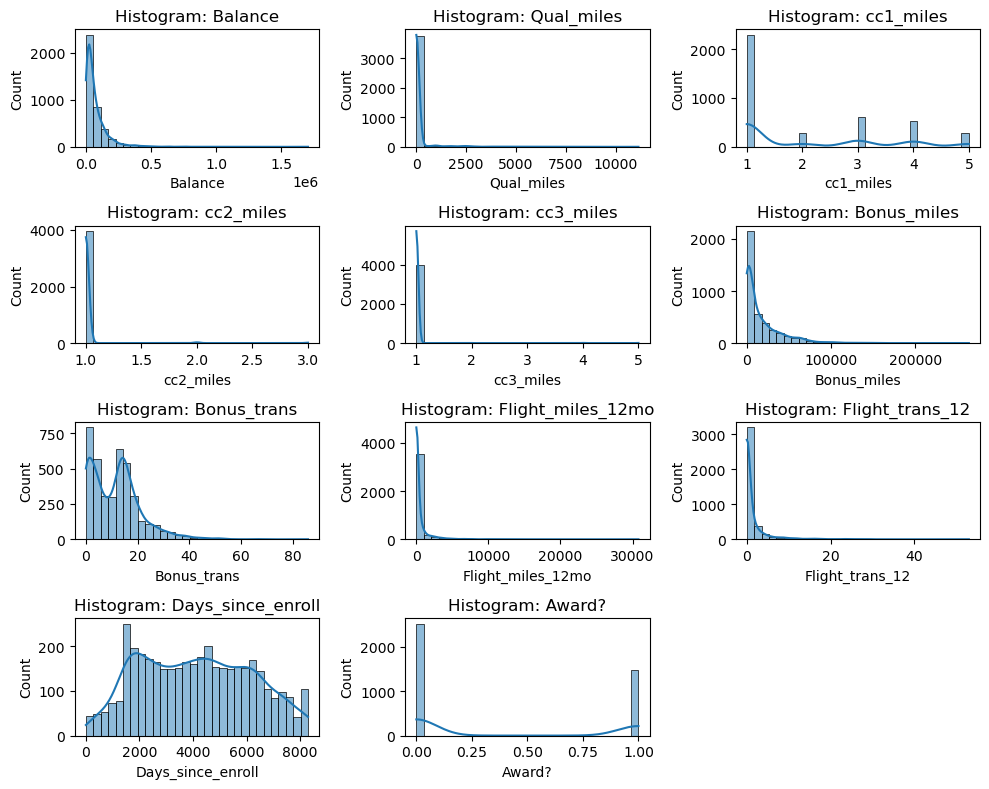

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns

num_cols = new_df.select_dtypes(include=[np.number]).columns.tolist() #Find Numerical Columns 
plt.figure(figsize=(10,8))
for i, col in enumerate(num_cols, 1):
    plt.subplot(4,3, i)
    sns.histplot(new_df[col], kde=True, bins=30) #Plot Histplot Of Each Numerical Columns TO identify Features Distributions
    plt.title(f"Histogram: {col}")
plt.tight_layout()
plt.show()

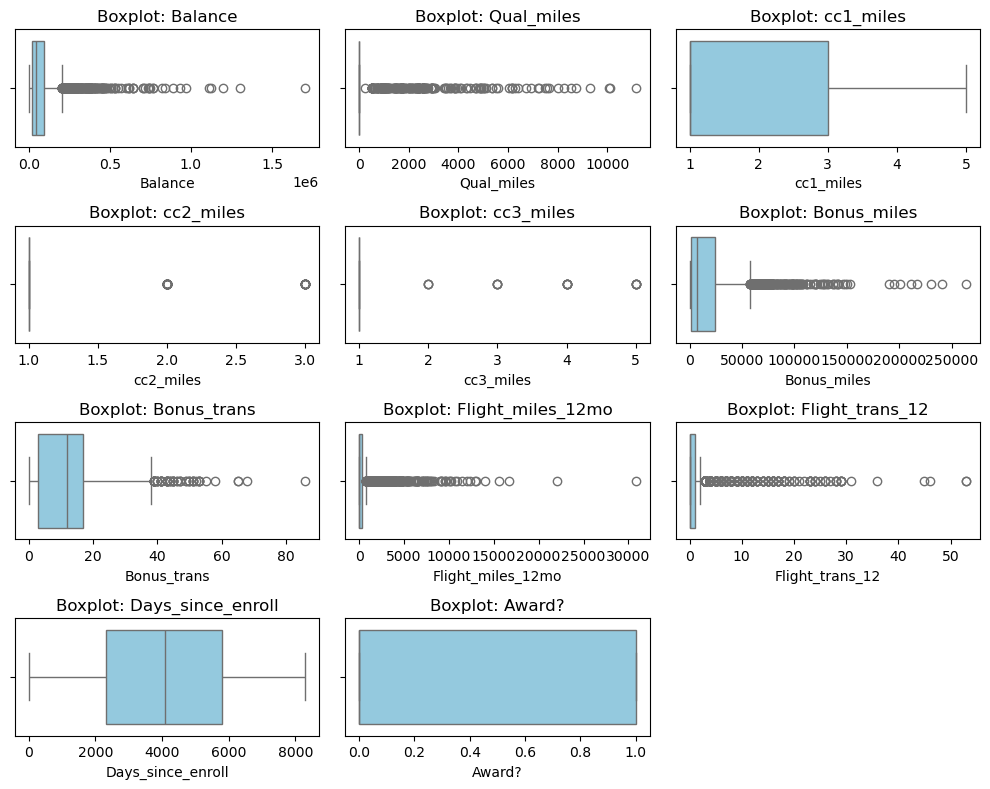

In [7]:
plt.figure(figsize=(10, 8))
for i, col in enumerate(num_cols, 1):
    plt.subplot(4, 3, i)
    sns.boxplot(x=new_df[col], color="skyblue")  #Plot Boxplot For Outlier Detection 
    plt.title(f"Boxplot: {col}")
plt.tight_layout()
plt.show()

<Axes: >

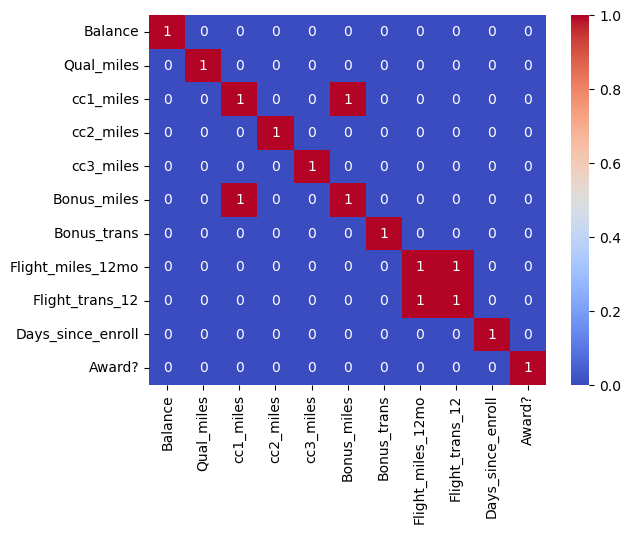

In [8]:
sns.heatmap(new_df.corr(numeric_only = True)>0.7, cmap = 'coolwarm' , annot =  True)

### Implementing Clustering Algorithms:
- Implement the K-Means and DBSCAN algorithms using a programming language such as Python with libraries like scikit-learn.
- Apply each clustering algorithm to the pre-processed dataset to identify clusters within the data.
- Experiment with different parameter settings for K-means (Elbow curve for different K values) and DBSCAN (e.g., epsilon, minPts) and evaluate the clustering results.


In [9]:
from sklearn.preprocessing import StandardScaler
ss= StandardScaler()

df_scaled = ss.fit_transform(new_df)
df_scaled = pd.DataFrame(df_scaled, columns=new_df.columns)
df_scaled.head()

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
0,-0.451141,-0.186299,-0.769578,-0.098242,-0.062767,-0.702786,-1.104065,-0.328603,-0.362168,1.395454,-0.766919
1,-0.539457,-0.186299,-0.769578,-0.098242,-0.062767,-0.701088,-0.999926,-0.328603,-0.362168,1.379957,-0.766919
2,-0.320031,-0.186299,-0.769578,-0.098242,-0.062767,-0.539253,-0.791649,-0.328603,-0.362168,1.411920,-0.766919
3,-0.583799,-0.186299,-0.769578,-0.098242,-0.062767,-0.689286,-1.104065,-0.328603,-0.362168,1.372208,-0.766919
4,0.239678,-0.186299,1.409471,-0.098242,-0.062767,1.083121,1.499394,1.154932,0.692490,1.363975,1.303918


In [10]:
from sklearn.cluster import KMeans, DBSCAN
from scipy.cluster.hierarchy import linkage, dendrogram, fcluster

In [11]:
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, random_state=42)
    kmeans.fit(df_scaled)
    wcss.append(kmeans.inertia_)

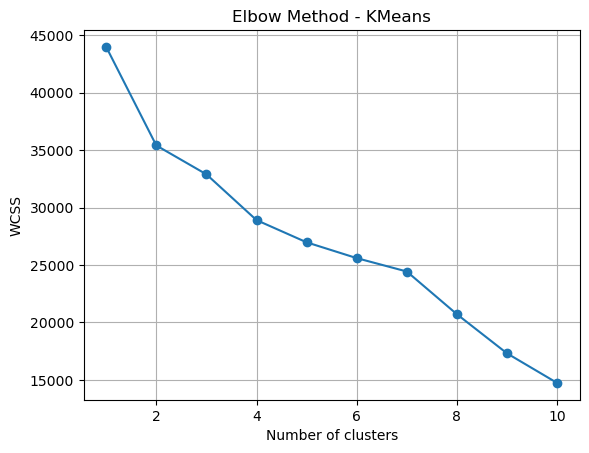

In [12]:
plt.plot(range(1, 11), wcss, marker='o')
plt.title('Elbow Method - KMeans')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.grid()
plt.show()

In [13]:
kmeans = KMeans(n_clusters=4, random_state=42)
df['KMeans_Cluster'] = kmeans.fit_predict(df_scaled)

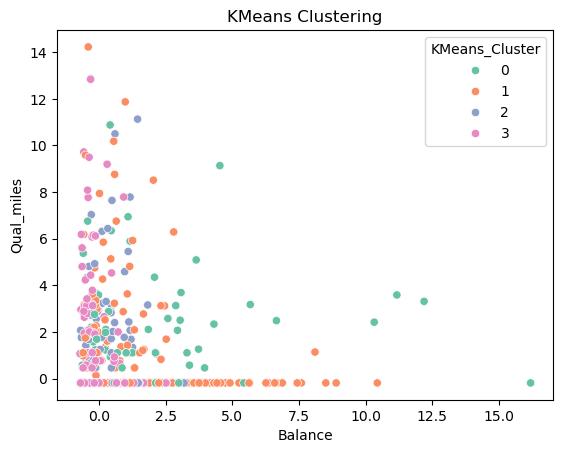

In [14]:
sns.scatterplot(x=df_scaled.iloc[:,0], y=df_scaled.iloc[:,1], hue=df['KMeans_Cluster'], palette='Set2')
plt.title('KMeans Clustering')
plt.show()

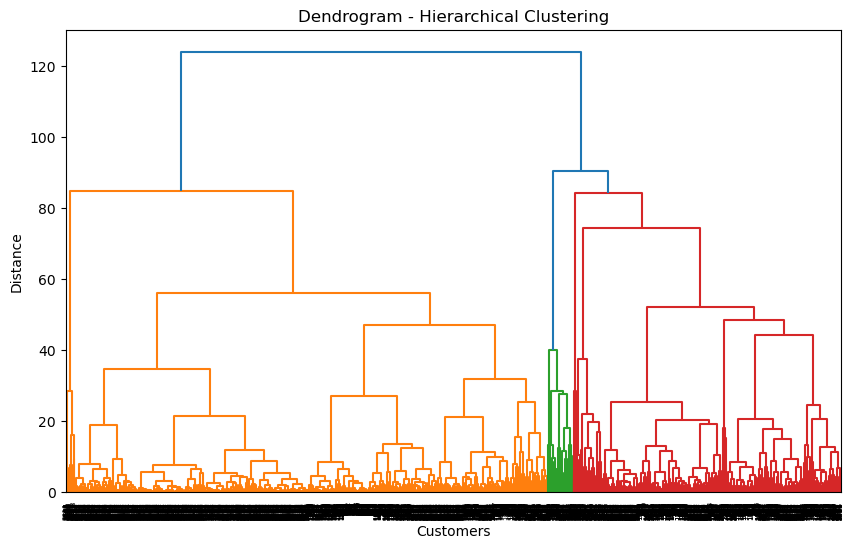

In [15]:
linkage_matrix = linkage(df_scaled, method='ward')

plt.figure(figsize=(10, 6))
dendrogram(linkage_matrix)
plt.title('Dendrogram - Hierarchical Clustering')
plt.xlabel('Customers')
plt.ylabel('Distance')
plt.show()

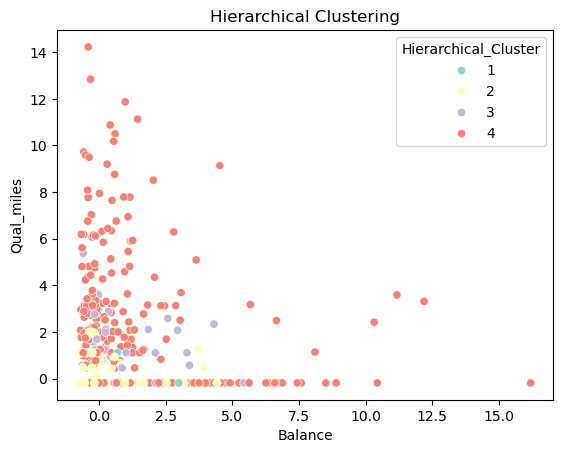

In [16]:
df['Hierarchical_Cluster'] = fcluster(linkage_matrix, t=4, criterion='maxclust')

sns.scatterplot(x=df_scaled.iloc[:, 0], y=df_scaled.iloc[:, 1], hue=df['Hierarchical_Cluster'], palette='Set3')
plt.title('Hierarchical Clustering')
plt.show()

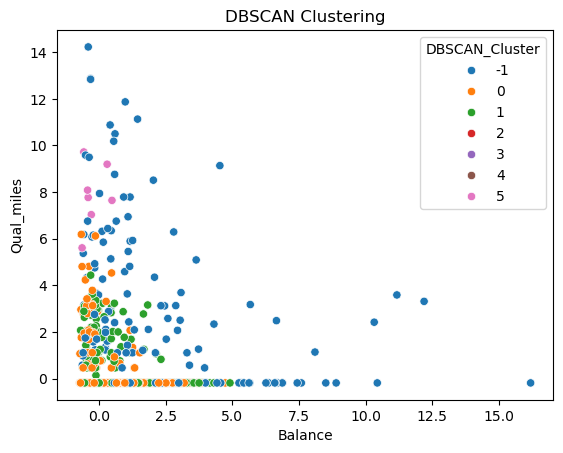

In [17]:
dbscan = DBSCAN(eps=1.8, min_samples=5)  # adjust eps as needed
df['DBSCAN_Cluster'] = dbscan.fit_predict(df_scaled)

sns.scatterplot(x=df_scaled.iloc[:, 0], y=df_scaled.iloc[:, 1], hue=df['DBSCAN_Cluster'], palette='tab10')
plt.title('DBSCAN Clustering')
plt.show()

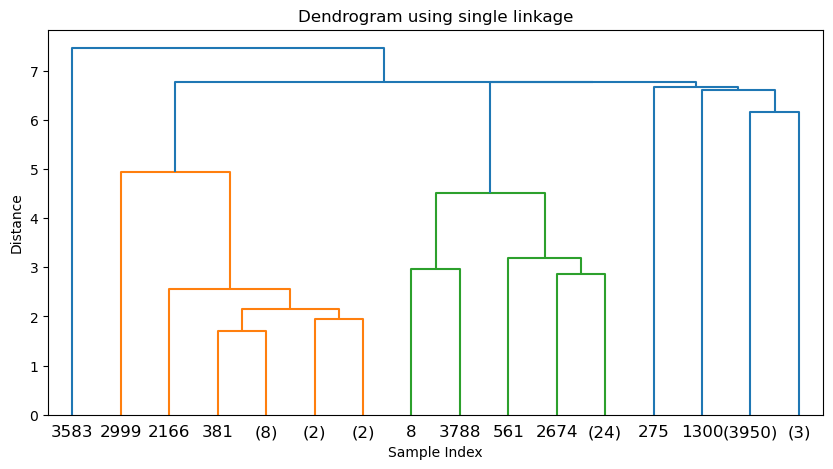

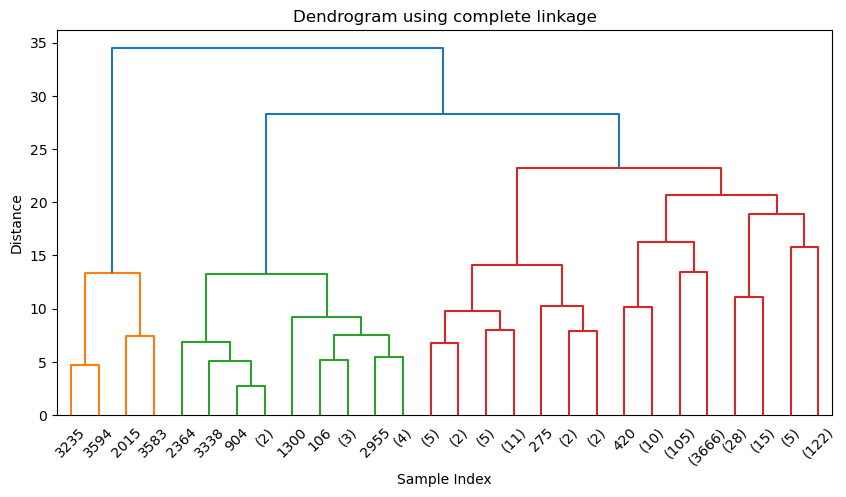

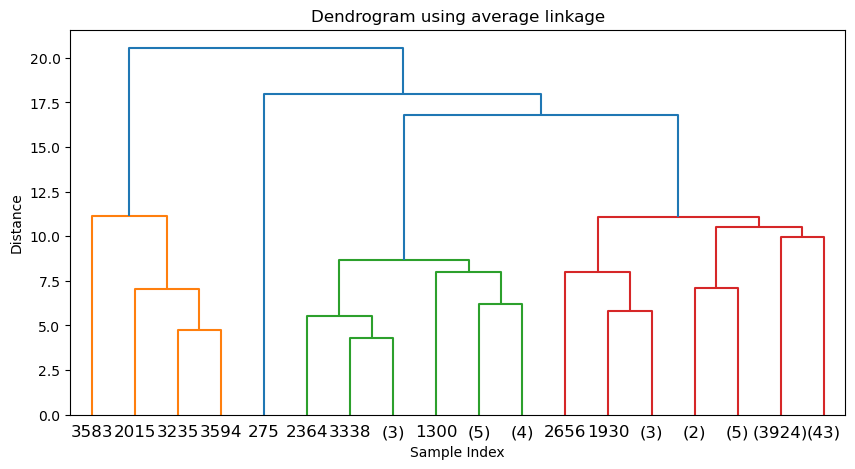

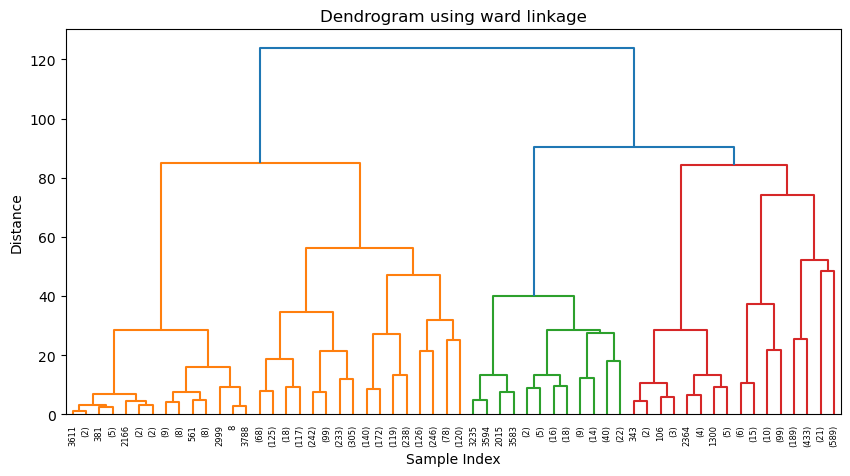

In [18]:
linkage_methods = ['single', 'complete', 'average', 'ward']

for method in linkage_methods:
    plt.figure(figsize=(10, 5))
    Z = linkage(df_scaled, method=method)
    dendrogram(Z, truncate_mode="level", p=5)
    plt.title(f"Dendrogram using {method} linkage")
    plt.xlabel("Sample Index")
    plt.ylabel("Distance")
    plt.show()

In [19]:
Z = linkage(df_scaled, method='ward')
clusters_hier = fcluster(Z, t=4, criterion='maxclust')  # Try different cluster numbers
df['Hierarchical_Cluster'] = clusters_hier

# Try multiple combinations
from sklearn.metrics import silhouette_score

eps_values = [1.5, 2, 2.5]
min_samples_values = [3, 5, 10]

for eps in eps_values:
    for min_samples in min_samples_values:
        db = DBSCAN(eps=eps, min_samples=min_samples)
        labels = db.fit_predict(df_scaled)
        n_clusters = len(set(labels)) - (1 if -1 in labels else 0)
        sil_score = -1
        if n_clusters > 1:
            sil_score = silhouette_score(df_scaled, labels)
        print(f"EPS: {eps}, MinPts: {min_samples}, Clusters: {n_clusters}, Silhouette Score: {sil_score:.3f}")

EPS: 1.5, MinPts: 3, Clusters: 9, Silhouette Score: 0.213
EPS: 1.5, MinPts: 5, Clusters: 5, Silhouette Score: 0.254
EPS: 1.5, MinPts: 10, Clusters: 3, Silhouette Score: 0.246
EPS: 2, MinPts: 3, Clusters: 12, Silhouette Score: 0.246
EPS: 2, MinPts: 5, Clusters: 6, Silhouette Score: 0.254
EPS: 2, MinPts: 10, Clusters: 3, Silhouette Score: 0.255
EPS: 2.5, MinPts: 3, Clusters: 5, Silhouette Score: 0.526
EPS: 2.5, MinPts: 5, Clusters: 3, Silhouette Score: 0.543
EPS: 2.5, MinPts: 10, Clusters: 4, Silhouette Score: 0.509


In [20]:
# Summary of clustering
print(df.groupby('KMeans_Cluster').mean(numeric_only=True))
print(df['DBSCAN_Cluster'].value_counts())

                        ID#        Balance  Qual_miles  cc1_miles  cc2_miles  \
KMeans_Cluster                                                                 
0               1750.333333  193291.147436  795.455128   2.179487   1.038462   
1               1658.865158  122119.899548  151.724887   3.885068   1.002715   
2               1101.367314   59693.586570  112.733010   1.372168   1.031553   
3               3055.842210   36920.458056   96.690413   1.269640   1.006658   

                cc3_miles   Bonus_miles  Bonus_trans  Flight_miles_12mo  \
KMeans_Cluster                                                            
0                1.000000  32292.288462    27.628205        5530.230769   
1                1.043439  43772.394570    19.398190         366.520362   
2                1.000809   6311.116505     8.456311         258.830097   
3                1.000000   4897.208389     6.790280         167.861518   

                Flight_trans_12  Days_since_enroll    Award?  \
KMea

###  Cluster Analysis and Interpretation:
- Analyse the clusters generated by each clustering algorithm and interpret the characteristics of each cluster. Write you insights in few comments.

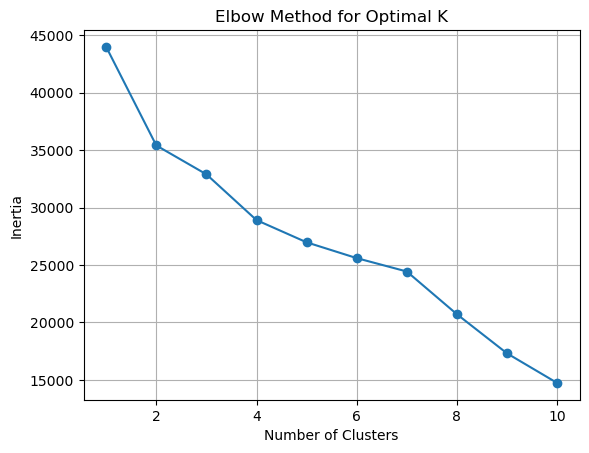

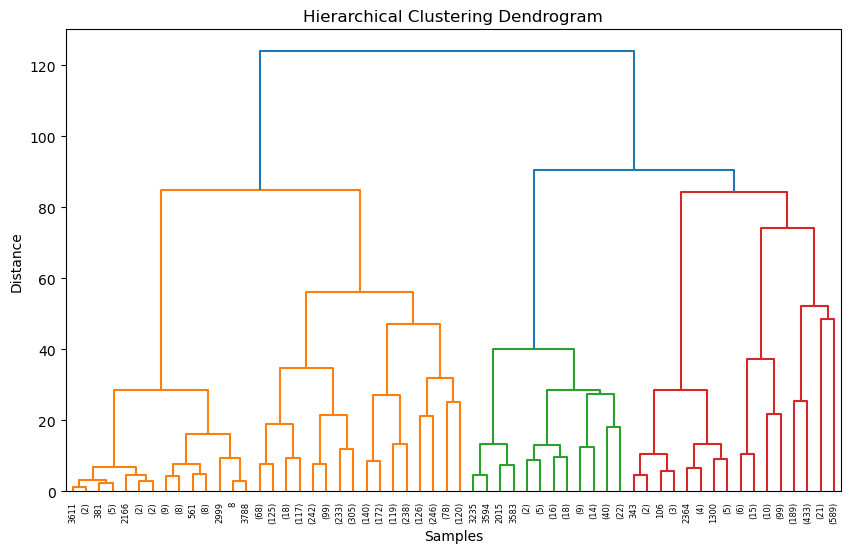

KMeans Cluster Summary:
                         ID#        Balance  Qual_miles  cc1_miles  cc2_miles  \
KMeans_Cluster                                                                 
0               1750.333333  193291.147436  795.455128   2.179487   1.038462   
1               1658.865158  122119.899548  151.724887   3.885068   1.002715   
2               1101.367314   59693.586570  112.733010   1.372168   1.031553   
3               3055.842210   36920.458056   96.690413   1.269640   1.006658   

                cc3_miles   Bonus_miles  Bonus_trans  Flight_miles_12mo  \
KMeans_Cluster                                                            
0                1.000000  32292.288462    27.628205        5530.230769   
1                1.043439  43772.394570    19.398190         366.520362   
2                1.000809   6311.116505     8.456311         258.830097   
3                1.000000   4897.208389     6.790280         167.861518   

                Flight_trans_12  Days_since

In [21]:
# -----------------------------
# 1. K-MEANS CLUSTERING
# -----------------------------
# Find optimal number of clusters using Elbow Method
inertia = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(df_scaled)
    inertia.append(kmeans.inertia_)

# Plot Elbow Curve
plt.plot(range(1, 11), inertia, marker='o')
plt.title('Elbow Method for Optimal K')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.grid()
plt.show()

# Fit KMeans with optimal K (e.g., 4)
kmeans = KMeans(n_clusters=4, random_state=42)
df['KMeans_Cluster'] = kmeans.fit_predict(df_scaled)

# -----------------------------
# 2. HIERARCHICAL CLUSTERING
# -----------------------------
# Create linkage matrix
linked = linkage(df_scaled, method='ward')

# Dendrogram to visualize clusters
plt.figure(figsize=(10, 6))
dendrogram(linked, truncate_mode='level', p=5)
plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('Samples')
plt.ylabel('Distance')
plt.show()

# Assign clusters from dendrogram (e.g., 4 clusters)
df['Hierarchical_Cluster'] = fcluster(linked, 4, criterion='maxclust')

# -----------------------------
# 3. DBSCAN CLUSTERING
# -----------------------------
dbscan = DBSCAN(eps=2, min_samples=5)
df['DBSCAN_Cluster'] = dbscan.fit_predict(df_scaled)

# -----------------------------
# ANALYZE CLUSTER CHARACTERISTICS
# -----------------------------
# Mean values by cluster
kmeans_summary = df.groupby('KMeans_Cluster').mean()
hierarchical_summary = df.groupby('Hierarchical_Cluster').mean()
dbscan_summary = df.groupby('DBSCAN_Cluster').mean()

# Display summaries
print("KMeans Cluster Summary:\n", kmeans_summary)
print("\nHierarchical Cluster Summary:\n", hierarchical_summary)
print("\nDBSCAN Cluster Summary:\n", dbscan_summary)

### Visualization:
- Visualize the clustering results using scatter plots or other suitable visualization techniques.
- Plot the clusters with different colours to visualize the separation of data points belonging to different clusters.


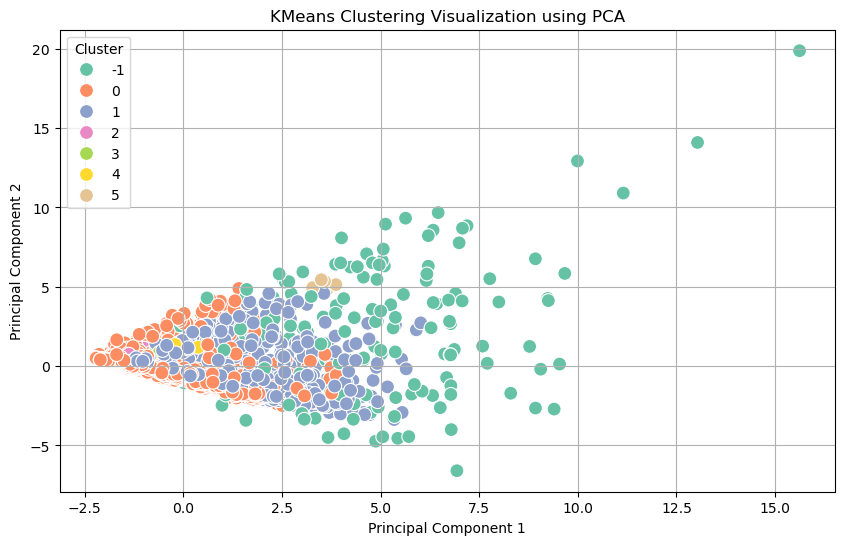

In [22]:
from sklearn.decomposition import PCA
from sklearn.cluster import DBSCAN
df['Cluster'] = df['DBSCAN_Cluster']


dbscan = DBSCAN(eps=0.5, min_samples=5)
df['DBSCAN_Cluster'] = dbscan.fit_predict(df_scaled)
# PCA for visualization
pca = PCA(n_components=2)
pca_components = pca.fit_transform(df_scaled)

df['PCA1'] = pca_components[:, 0]
df['PCA2'] = pca_components[:, 1]

# Reduce dimensions using PCA for visualization
pca = PCA(n_components=2)
pca_components = pca.fit_transform(df_scaled)

# Add PCA results to DataFrame
df['PCA1'] = pca_components[:, 0]
df['PCA2'] = pca_components[:, 1]

# Visualize the clusters
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='PCA1', y='PCA2', hue='Cluster', palette='Set2', s=100)
plt.title("KMeans Clustering Visualization using PCA")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.legend(title='Cluster')
plt.grid(True)
plt.show()